In [1]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd
from os.path import join as pjoin
import scipy.io as sio
import skimage.data as data
import skimage.filters as filters
import skimage.color as color

In [2]:
# Get the filename for an example .mat file from the data directory.
data_dir = pjoin(getcwd(), 'data')
mat_fname = pjoin(data_dir, 'fractals_1.mat')

print('mat_fname = ', mat_fname, '\n')

# Load the .mat file contents.
mat_contents = sio.loadmat(mat_fname)
print('mat_contents.keys = ', sorted(mat_contents.keys()))

raw_image_set = mat_contents['X']

mat_fname =  /Users/vincentdong/Documents/College/UCLA/14 Spring 2019/CS 168 - Computational Methods for Medical Imaging/Project/CS168-Automatic-TICI/data/fractals_1.mat 

mat_contents.keys =  ['TICI_Dr1', 'TICI_Dr2', 'TICI_report', 'X', '__globals__', '__header__', '__version__']


In [3]:
# Originally, image_set[:, :, k] is the kth image.
# Preprocess the image_set so that image_set[k, :, :] is the kth image.
image_set = np.transpose(raw_image_set, (2, 0, 1))
print('The shape of the image set is: {}'.format(np.shape(image_set)))

The shape of the image set is: (20, 1024, 1024)


In [26]:
def gray2binary(image_set):
    thresholds = list(map(filters.threshold_li, image_set))
    min_threshold = min(thresholds)
    print('min_threshold = ', min_threshold)
    return np.array(list(map(lambda img : img > min_threshold, image_set)))

binary_image_set = gray2binary(image_set)

min_threshold =  0.006395157874710995


In [37]:
def summarize_middle_artery(image_set):
    # Assume all the images have the same dimensions.
    image_count, image_height, image_width = np.shape(image_set)
    result = []
    for image in image_set:
        # Only consider the middle quarter of the upper half image.
        middle_section = image[0:int(image_height/2), int(image_width*3/8):int(image_width*5/8)]
        summary = np.array(list(map(all, middle_section)))
        summary = np.tile(summary[:, np.newaxis], 200)
        result.append(summary)
    return np.array(result)
    

middle_artery_summary_image_set = summarize_middle_artery(binary_image_set)
print(middle_artery_summary_image_set.shape)

(20, 512, 200)


0 0
<class 'numpy.ndarray'>
0 1
<class 'numpy.ndarray'>
0 2
<class 'numpy.ndarray'>
1 0
<class 'numpy.ndarray'>
1 1
<class 'numpy.ndarray'>
1 2
<class 'numpy.ndarray'>
2 0
<class 'numpy.ndarray'>
2 1
<class 'numpy.ndarray'>
2 2
<class 'numpy.ndarray'>
3 0
<class 'numpy.ndarray'>
3 1
<class 'numpy.ndarray'>
3 2
<class 'numpy.ndarray'>
4 0
<class 'numpy.ndarray'>
4 1
<class 'numpy.ndarray'>
4 2
<class 'numpy.ndarray'>
5 0
<class 'numpy.ndarray'>
5 1
<class 'numpy.ndarray'>
5 2
<class 'numpy.ndarray'>
6 0
<class 'numpy.ndarray'>
6 1
<class 'numpy.ndarray'>
6 2
<class 'numpy.ndarray'>
7 0
<class 'numpy.ndarray'>
7 1
<class 'numpy.ndarray'>
7 2
<class 'numpy.ndarray'>
8 0
<class 'numpy.ndarray'>
8 1
<class 'numpy.ndarray'>
8 2
<class 'numpy.ndarray'>
9 0
<class 'numpy.ndarray'>
9 1
<class 'numpy.ndarray'>
9 2
<class 'numpy.ndarray'>
10 0
<class 'numpy.ndarray'>
10 1
<class 'numpy.ndarray'>
10 2
<class 'numpy.ndarray'>
11 0
<class 'numpy.ndarray'>
11 1
<class 'numpy.ndarray'>
11 2
<class 'nu

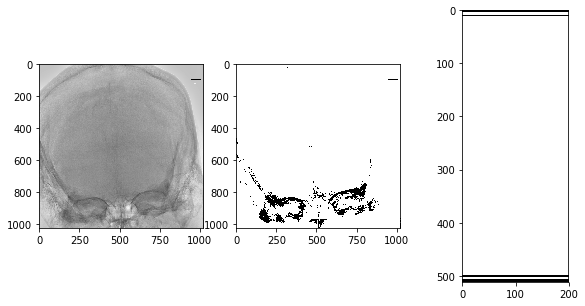

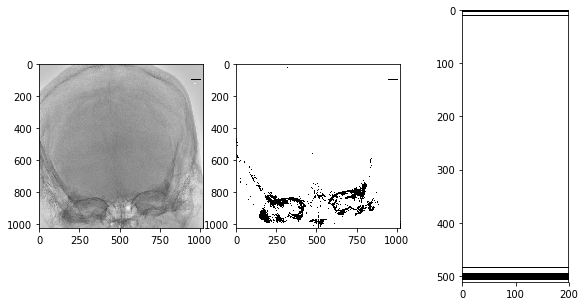

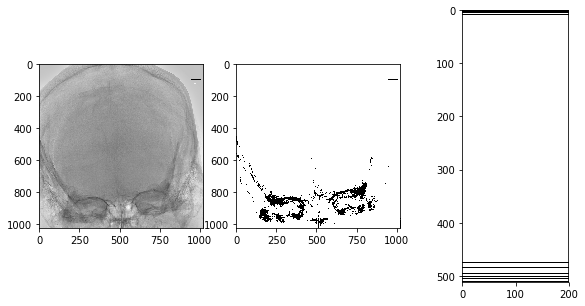

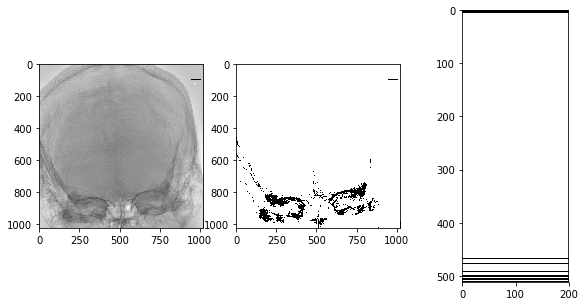

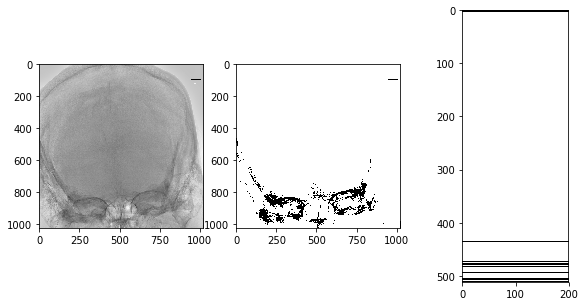

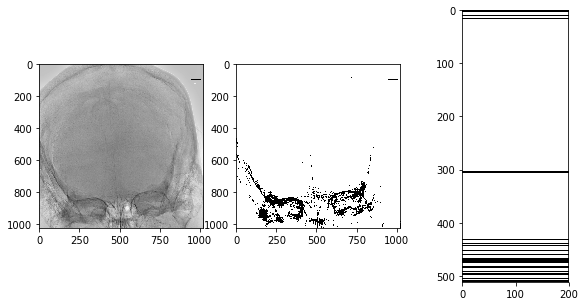

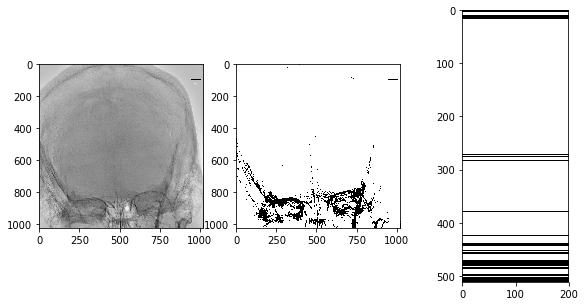

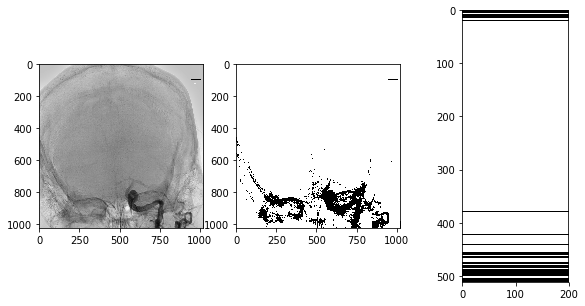

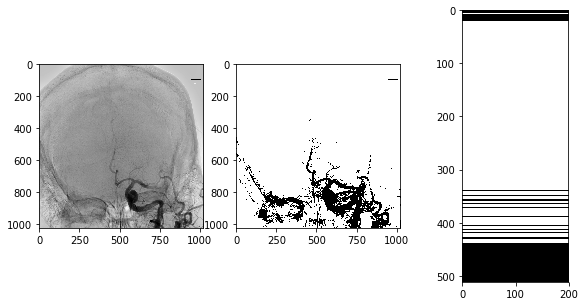

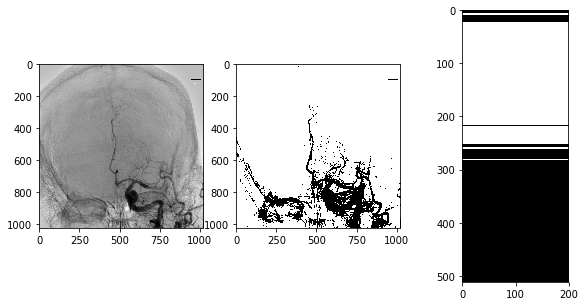

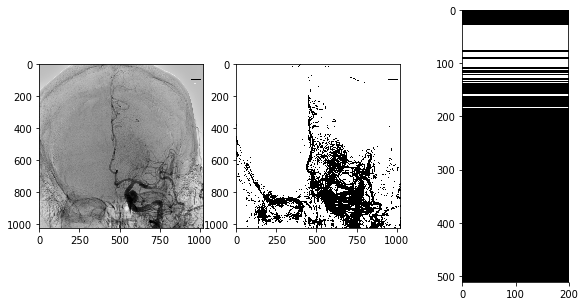

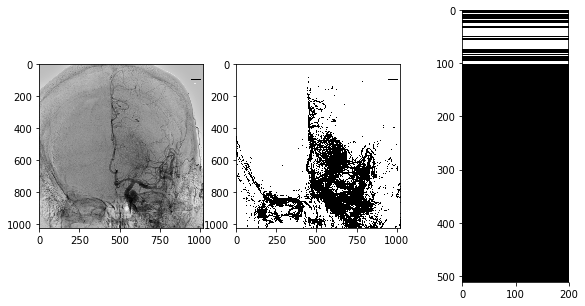

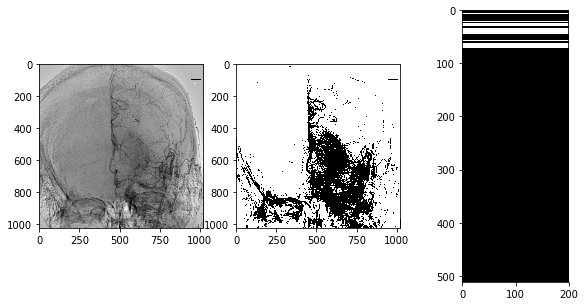

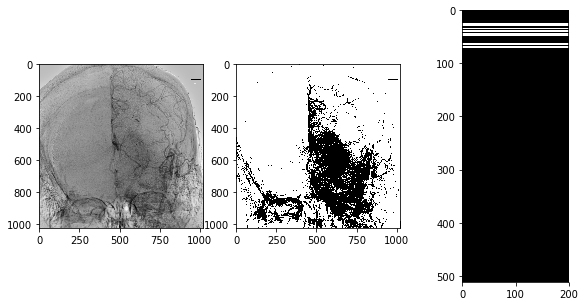

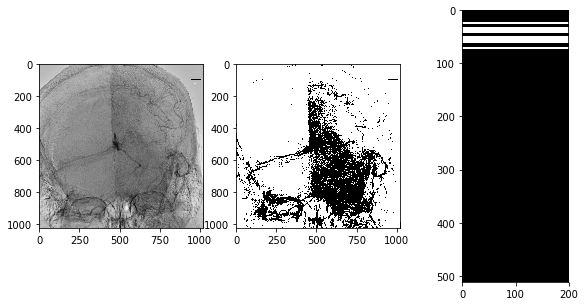

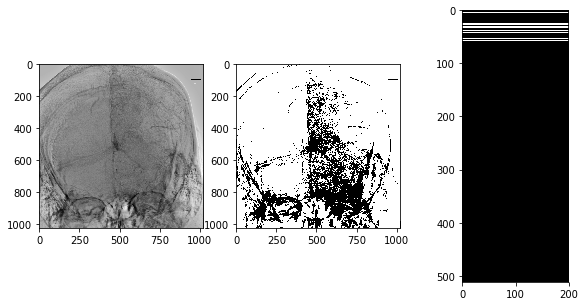

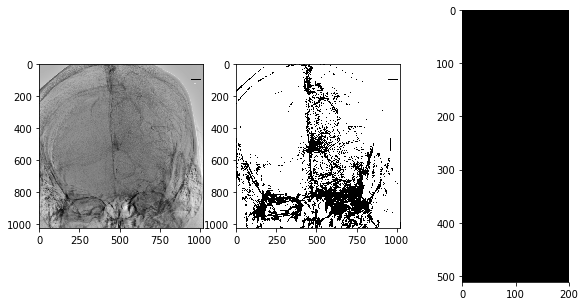

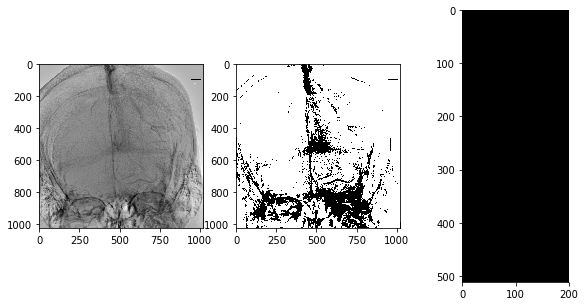

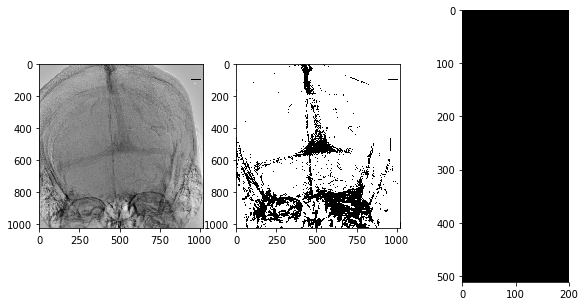

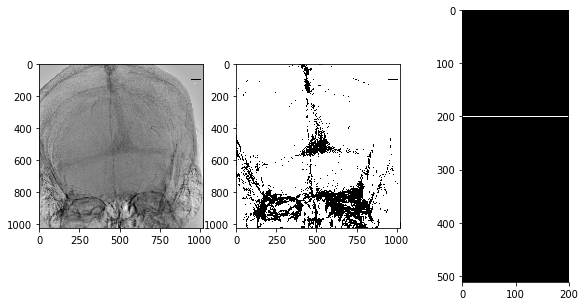

In [39]:
def show_images(all_image_sets):
    if len(all_image_sets) == 0:
        return
    # Assume all image sets have the same number of images.
    image_count = len(all_image_sets[0])
    n_image_sets = len(all_image_sets)
    for n in range(image_count):
        plt.figure(figsize=(10,5))
        for k in range(n_image_sets):
            plt.subplot(1, n_image_sets, k + 1)
            plt.imshow(all_image_sets[k][n], cmap='gray')
            
show_images([image_set, binary_image_set, middle_artery_summary_image_set])